In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Rescaling, Conv2D, MaxPooling2D, Input
from keras import backend as K
from keras.datasets import mnist
from keras.utils import plot_model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# 1. Load and Preprocess Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [32]:
train_data.shape

(42000, 785)

In [33]:
test_data.shape

(28000, 784)

In [34]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
for i in train_data.columns:
  print(i)
  print(np.unique(train_data[i]))
  print('-'*50)


Streaming output truncated to the last 5000 lines.
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 208 210 211 212 213 214 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 235 236 237 238 239 240 241 242 243


In [40]:
X_train = train_data.drop('label', axis=1)  # Use parentheses and specify axis=1 for columns
y_train = train_data['label']  # This part is correct


Normalize Pixel Values

The pixel values in the dataset range from 0 to 255. Normalizing them to a range of [0, 1] helps the model converge faster and improves performance.

In [41]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
test = test_data / 255.0

In [42]:
for i in test.columns:
  print(i)
  print(np.unique(test[i]))
  print('-'*50)


Streaming output truncated to the last 5000 lines.
 0.4        0.40392157 0.40784314 0.41176471 0.41568627 0.41960784
 0.42352941 0.42745098 0.43137255 0.43529412 0.43921569 0.44313725
 0.44705882 0.45098039 0.45490196 0.45882353 0.4627451  0.46666667
 0.47058824 0.4745098  0.47843137 0.48235294 0.48627451 0.49019608
 0.49411765 0.49803922 0.50196078 0.50588235 0.50980392 0.51372549
 0.51764706 0.52156863 0.5254902  0.52941176 0.53333333 0.5372549
 0.54117647 0.54509804 0.54901961 0.55294118 0.55686275 0.56078431
 0.56470588 0.56862745 0.57254902 0.57647059 0.58039216 0.58431373
 0.58823529 0.59215686 0.59607843 0.6        0.60392157 0.60784314
 0.61176471 0.61568627 0.61960784 0.62352941 0.62745098 0.63137255
 0.63529412 0.63921569 0.64313725 0.64705882 0.65098039 0.65490196
 0.65882353 0.6627451  0.66666667 0.67058824 0.6745098  0.67843137
 0.68235294 0.68627451 0.69019608 0.69411765 0.69803922 0.70196078
 0.70588235 0.70980392 0.71372549 0.71764706 0.72156863 0.7254902
 0.72941176 0

Split Training Data

Split the training data into training and validation sets to evaluate your model's performance during training.

In [43]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Reshape Data

reshape the data to include the channel dimension (grayscale images have one channel).

Explanation of Dimensions

-1: This is a placeholder that automatically infers the number of samples based on the size of the dataset. For example, if you have 42,000 images in your training set, this will be inferred as 42,000.

28, 28: These are the height and width of each image. The MNIST dataset consists of grayscale images that are 28x28 pixels.

1: This represents the number of channels in the image. Since MNIST images are grayscale, there is only one channel. For RGB images, this value would be 3 (representing red, green, and blue channels).

In [44]:
# Reshape data for CNNs (28x28 images with 1 channel)
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)
test_data = test_data.values.reshape(-1, 28, 28, 1)


Standardize Data

Standardization ensures zero mean and unit variance for each feature. This step is optional but can further stabilize training.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)
X_val = scaler.transform(X_val.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)
test_data = scaler.transform(test_data.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)


One-Hot Encode Labels

For classification tasks with neural networks, one-hot encoding the labels is often required.


In [48]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)


Data Augmentation

To improve generalization and reduce overfitting on small datasets like MNIST, apply data augmentation techniques such as rotations or shifts.

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the generator on training data
datagen.fit(X_train)


In [50]:
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", test_data.shape)


Training data shape: (33600, 28, 28, 1)
Validation data shape: (8400, 28, 28, 1)
Test data shape: (28000, 28, 28, 1)


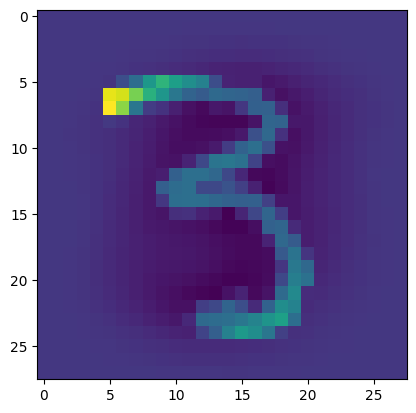

In [52]:
g = plt.imshow(X_train[2][:,:,0])


In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [55]:
model = Sequential()

# First Convolutional Layer
#-----------------
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))



# Second Convolutional Layer
#-----------------
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Layer
#-----------------
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))





# Flattening Layer
model.add(Flatten())

# Fully Connected Dense Layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output Layer (10 classes for digits 0-9)
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [57]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop training if val_loss doesn't improve after 3 epochs
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Train the CNN model with early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,            # Maximum number of epochs
                    batch_size=64,
                    callbacks=[early_stopping])  # Add early stopping callback


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 59s 105ms/step - accuracy: 0.6326 - loss: 1.1097 - val_accuracy: 0.9650 - val_loss: 0.1145
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 55s 105ms/step - accuracy: 0.9398 - loss: 0.2092 - val_accuracy: 0.9792 - val_loss: 0.0689
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.9581 - loss: 0.1349 - val_accuracy: 0.9840 - val_loss: 0.0535
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9671 - loss: 0.1111 - val_accuracy: 0.9840 - val_loss: 0.0491
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 54s 103ms/step - accuracy: 0.9703 - loss: 0.0951 - val_accuracy: 0.9880 - val_loss: 0.0403
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9755 - loss: 0.0838 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9781 - loss: 0.0762 - val_accuracy: 0.9848 - val_loss: 0.0465
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.9771 - loss: 0.

In [58]:
import numpy as np

# Predict probabilities for X_val using the trained model
predictions = model.predict(X_val)

# Convert probabilities to class labels (choose the class with the highest probability)
predicted_labels = np.argmax(predictions, axis=1)


263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


In [59]:
# Convert one-hot encoded y_val back to class labels
true_labels = np.argmax(y_val, axis=1)

# Compare predicted labels with true labels
comparison = (predicted_labels == true_labels)

# Calculate accuracy on validation set
accuracy = np.mean(comparison)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Validation Accuracy: 99.02%


In [61]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9889 - loss: 0.0387
Validation Accuracy: 99.02%


In [62]:
# Predict probabilities for test data
predictions = model.predict(test_data)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step


In [64]:
model.save("mnist_conv_mod.keras")

In [66]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mnist_conv_mod.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [68]:
import pandas as pd

# Create a DataFrame with ImageId and predicted labels
submission = pd.DataFrame({
    "ImageId": list(range(1, len(predicted_labels) + 1)),  # ImageId starts from 1
    "Label": predicted_labels
})

# Save the DataFrame to a CSV file
submission.to_csv("mnsit_cnv_submission.csv", index=False)
